<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_2_1_2_single_neuron_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.datasets as skds
import torch
import matplotlib.pyplot as plt

In [ ]:
X, Y = skds.make_blobs(n_samples=100, n_features=2,
                       centers=2, random_state=1)
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
print(X[1:5,:], Y[1:5])

tensor([[-9.1516, -4.8129],
        [-3.1037,  3.9020],
        [-1.4295,  5.1685],
        [-7.4694, -4.2020]], dtype=torch.float64) tensor([1, 0, 0, 1])


In [ ]:
def draw_05_line():
  line = lambda x: -w0/w1 * x - b/w1
  x0   = torch.tensor([-11, 0])
  x1   = line(x0)

  plt.plot(x0, x1);
  plt.scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black");

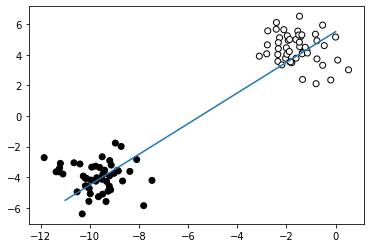

In [ ]:
w0, w1, b = 1, -1, 5.5
draw_05_line()

In [ ]:
z =     lambda w0,w1,b,x0,x1: w0 * x0 + w1*x1 + b
y =     lambda z: 1 / (1 + torch.exp(-z))
model = lambda w0,w1,b,x0,x1: y(z(w0, w1, b,x0,x1))

In [ ]:
def draw_prob_contours():
  x0, x1 = torch.linspace(-12, 1, 100), torch.linspace(-7, 7, 100)
  grid0, grid1 = torch.meshgrid(x0, x1)
  fig = plt.contour(grid0, grid1, model(w0, w1, b, grid0, grid1), cmap="Greys")
  fig.clabel(inline=True, fontsize=10)
  plt.scatter(X[:, 0], X[:, 1],
            c=Y, cmap="Greys", edgecolor="black");

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


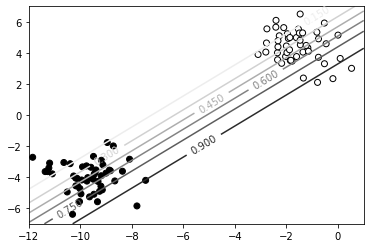

In [ ]:
draw_prob_contours()

In [ ]:
dHdy  =  lambda y,yt: -(yt - y) / (y - y**2)
dydz  =  lambda y: y * (1 - y)
dzdw0 = lambda x0: x0
dzdw1 = lambda x1: x1
dzdb  =  1
def calc_dC():
  dH = torch.zeros(len(Y),3)
  for idx in range(len(Y)):
    data = (X[idx,0], X[idx,1], Y[idx])
    y_model = y(z(w0, w1, b, data[0], data[1]))
    
    A=dHdy(y_model, data[2])
    B=dydz(y_model)
    dH[idx,0]=A * B * dzdw0(data[0])
    dH[idx,1]=A * B * dzdw1(data[1])
    dH[idx,2]=A * B * dzdb
  return dH.mean(0)
dC=calc_dC()

In [ ]:
dC

tensor([ 2.4333,  1.7574, -0.0710])

In [ ]:
w0, w1, b = 1, -1, 5.5

tensor(0.7567) tensor(-1.1757) tensor(5.5071)


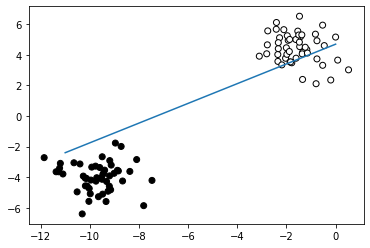

In [ ]:
alpha=0.1
dC=calc_dC()
(w0, w1, b) = torch.tensor((w0, w1, b))- alpha*dC
print(w0, w1, b)
draw_05_line()

In [ ]:
w0, w1, b = 1, -1, 5.5
alpha = 0.1

H = lambda y,yt: -(yt*torch.log(y) + (1-yt)*torch.log(1-y))
cost_per_point = H(model(w0, w1, b, X[:, 0], X[:, 1]), Y)

cost=torch.zeros(1000)
for iter_num in range(len(cost)):
  dC             = calc_dC()
  params         = torch.tensor((w0, w1, b))
  (w0, w1, b)    = params - alpha*dC
  cost_per_point = H(model(w0, w1, b,X[:, 0], X[:, 1]),Y)
  cost[iter_num] = cost_per_point.mean()

tensor(0.6219) tensor(-3.2859) tensor(4.8640)


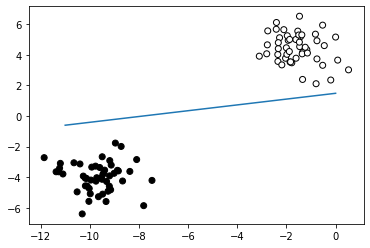

In [ ]:
draw_05_line()
print(w0, w1, b)

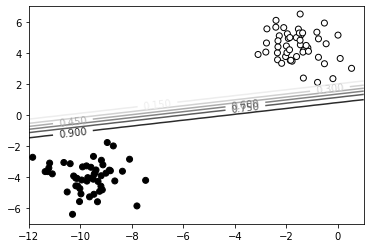

In [ ]:
draw_prob_contours()

tensor(-0.0010)
tensor([0.0002, 0.0040, 0.0015])


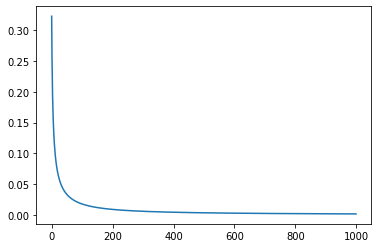

In [ ]:
plt.plot(range(len(cost)),cost)
err = (cost[-1]-cost[-2])/cost[-2]
dC = calc_dC()
print(err, dC, sep='\n')